In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset('exercise')

In [7]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [8]:
df.tail()

,Unnamed: 0,id,diet,pulse,time,kind
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running
89,89,30,no fat,150,30 min,running


In [16]:
df.shape


(90, 6)

In [17]:
df.describe()


,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
diet,0
pulse,0
time,0
kind,0


In [28]:
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [79]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.columns

Index(['id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [25]:
df.columns

Index(['id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

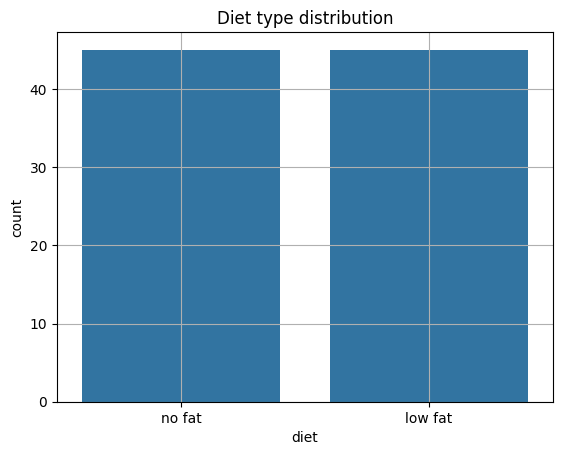

In [30]:
sns.countplot(x='diet', data = df)
plt.title("Diet type distribution")
plt.grid()
plt.show()

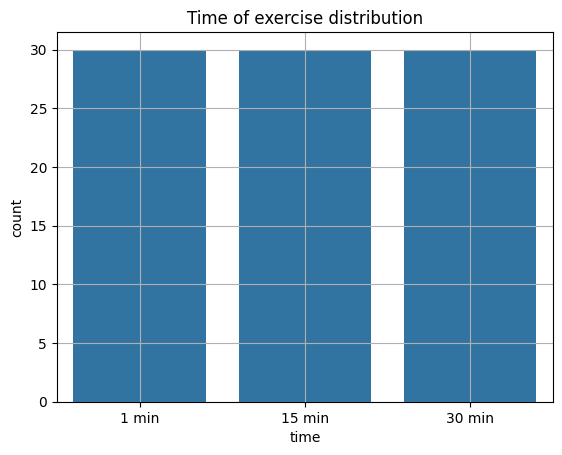

In [31]:
sns.countplot(x='time', data = df)
plt.title("Time of exercise distribution")
plt.grid()
plt.show()

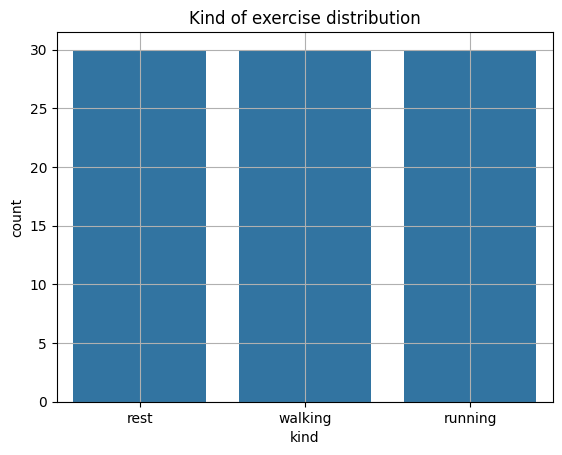

In [32]:
sns.countplot(x='kind', data = df)
plt.title("Kind of exercise distribution")
plt.grid()
plt.show()

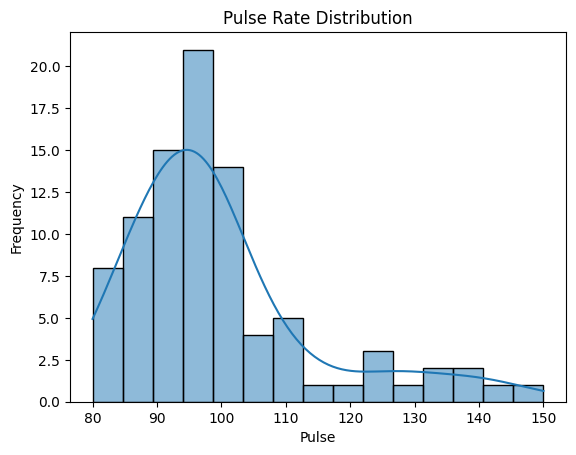

In [33]:
# Distribution of pulse rate
sns.histplot(df["pulse"], kde=True, bins=15)
plt.title("Pulse Rate Distribution")
plt.xlabel("Pulse")
plt.ylabel("Frequency")
plt.show()


In [35]:
Q1 = df['pulse'].quantile(0.25)
Q3 = df['pulse'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[(df['pulse']<lower_bound) | (df['pulse']>upper_bound)]
print("Outliers:", outliers.shape[0])
outliers

Lower Bound: 71.125
Upper Bound: 122.125
Outliers: 10


,id,diet,pulse,time,kind
70,24,low fat,132,15 min,running
76,26,no fat,126,15 min,running
77,26,no fat,143,30 min,running
79,27,no fat,126,15 min,running
80,27,no fat,140,30 min,running
82,28,no fat,124,15 min,running
83,28,no fat,140,30 min,running
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
89,30,no fat,150,30 min,running


In [36]:
#capping outliers
df['pulse'] = df['pulse'].clip(lower=lower_bound, upper=upper_bound)

In [37]:
((df['pulse']<lower_bound) | (df['pulse']>upper_bound)).sum()

np.int64(0)

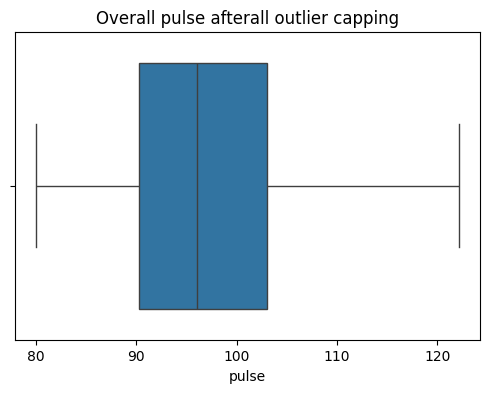

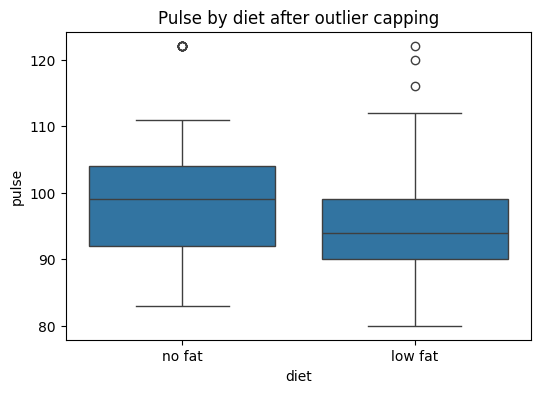

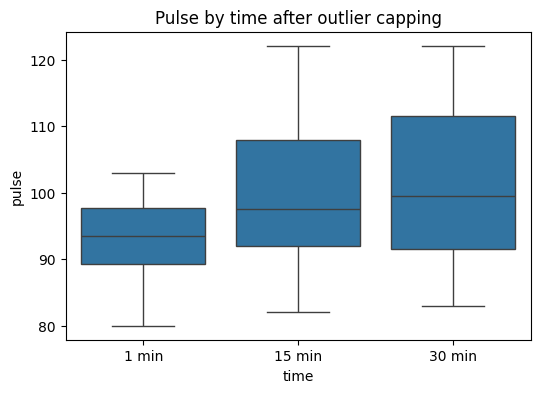

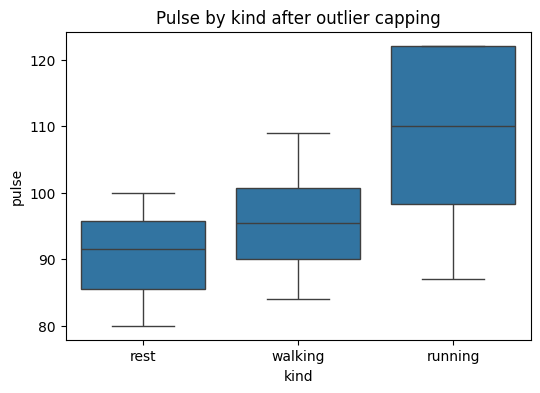

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pulse'])
plt.title('Overall pulse afterall outlier capping')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='diet', y='pulse', data=df)
plt.title("Pulse by diet after outlier capping")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='time', y='pulse', data=df)
plt.title("Pulse by time after outlier capping")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='kind', y='pulse', data=df)
plt.title("Pulse by kind after outlier capping")
plt.show()


In [39]:
# Recalculate IQR after capping
Q1_new = df['pulse'].quantile(0.25)
Q3_new = df['pulse'].quantile(0.75)
IQR_new = Q3_new - Q1_new

lower_bound_new = Q1_new - 1.5 * IQR_new
upper_bound_new = Q3_new + 1.5 * IQR_new


df['pulse'] = df['pulse'].clip(lower=lower_bound_new, upper=upper_bound_new)


((df['pulse'] < lower_bound_new) | (df['pulse'] > upper_bound_new)).sum()


np.int64(0)

In [43]:
outlier_rows = []

for group in df['diet'].unique():
    Q1 = df.loc[df['diet'] == group, 'pulse'].quantile(0.25)
    Q3 = df.loc[df['diet'] == group, 'pulse'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    group_outliers = df[(df['diet'] == group) &
                        ((df['pulse'] < lower_bound) | (df['pulse'] > upper_bound))]

    outlier_rows.append(group_outliers)

# Combine all outliers
outlier_df = pd.concat(outlier_rows)

print(outlier_df)


    id     diet    pulse    time     kind
70  24  low fat  122.125  15 min  running
71  24  low fat  120.000  30 min  running
74  25  low fat  116.000  30 min  running
76  26   no fat  122.125  15 min  running
77  26   no fat  122.125  30 min  running
79  27   no fat  122.125  15 min  running
80  27   no fat  122.125  30 min  running
82  28   no fat  122.125  15 min  running
83  28   no fat  122.125  30 min  running
85  29   no fat  122.125  15 min  running
86  29   no fat  122.125  30 min  running
89  30   no fat  122.125  30 min  running


In [44]:
pulse_stats = df['pulse'].describe().to_frame().T
pulse_stats['skew'] = df['pulse'].skew()
pulse_stats['kurtosis'] = df['pulse'].kurtosis()
display(pulse_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
pulse,90.0,98.313889,11.451063,80.0,90.25,96.0,103.0,122.125,0.830765,-0.051288


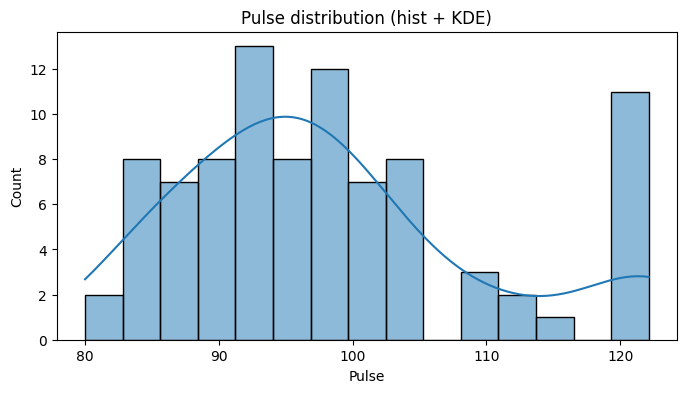

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(df['pulse'], kde=True, bins=15)
plt.xlabel('Pulse')
plt.title('Pulse distribution (hist + KDE)')
plt.show()

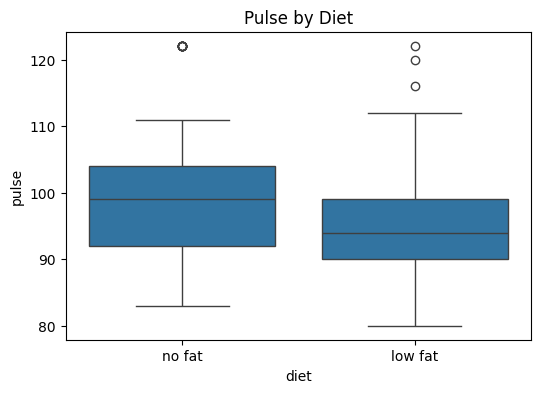

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diet', y='pulse')
plt.title('Pulse by Diet')
plt.show()

In [47]:
for col in ['diet', 'time', 'kind']:
    print(f"--- {col.upper()} ---")
    print(df[col].value_counts(), "\n")

--- DIET ---
diet
no fat     45
low fat    45
Name: count, dtype: int64 

--- TIME ---
time
1 min     30
15 min    30
30 min    30
Name: count, dtype: int64 

--- KIND ---
kind
rest       30
walking    30
running    30
Name: count, dtype: int64 



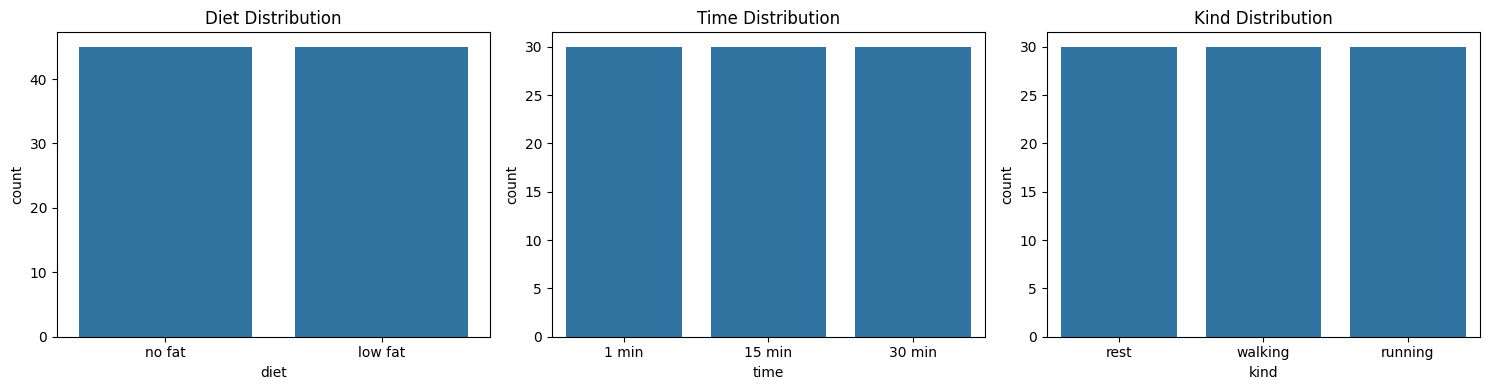

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(data=df, x='diet', ax=axes[0])
axes[0].set_title('Diet Distribution')

sns.countplot(data=df, x='time', ax=axes[1])
axes[1].set_title('Time Distribution')

sns.countplot(data=df, x='kind', ax=axes[2])
axes[2].set_title('Kind Distribution')

plt.tight_layout()
plt.show()


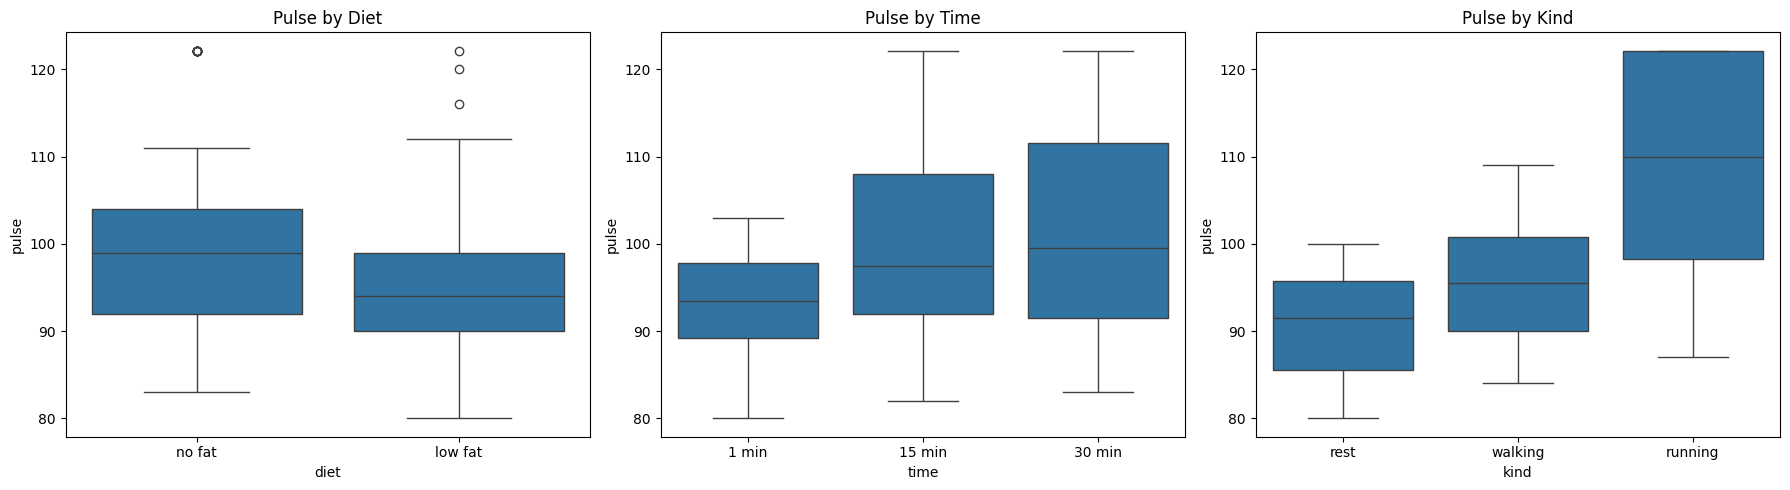

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='diet', y='pulse', ax=axes[0])
axes[0].set_title('Pulse by Diet')

sns.boxplot(data=df, x='time', y='pulse', ax=axes[1])
axes[1].set_title('Pulse by Time')

sns.boxplot(data=df, x='kind', y='pulse', ax=axes[2])
axes[2].set_title('Pulse by Kind')

plt.tight_layout()
plt.show()

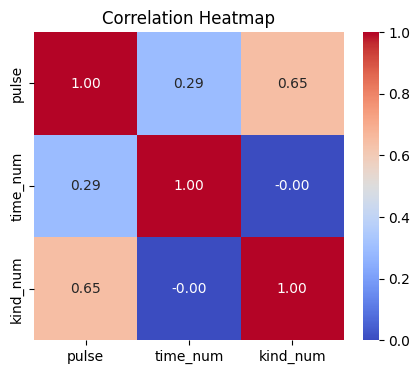

In [50]:
df_corr = df.copy()
time_map = {'1 min': 1, '15 min': 15, '30 min': 30}
kind_map = {'rest': 0, 'walking': 1, 'running': 2}

df_corr['time_num'] = df_corr['time'].map(time_map)
df_corr['kind_num'] = df_corr['kind'].map(kind_map)

# Correlation matrix
corr = df_corr[['pulse', 'time_num', 'kind_num']].corr()

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

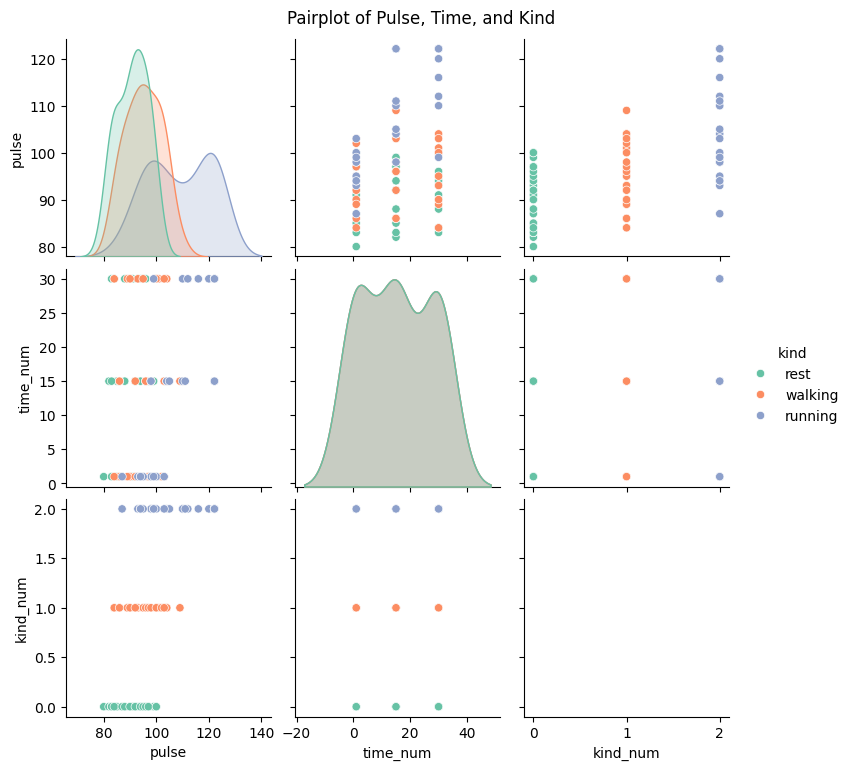

In [53]:
df_corr['pulse'] = pd.to_numeric(df_corr['pulse'], errors='coerce')
df_corr['time_num'] = pd.to_numeric(df_corr['time_num'], errors='coerce')
df_corr['kind_num'] = pd.to_numeric(df_corr['kind_num'], errors='coerce')

# Now run the pairplot
sns.pairplot(df_corr,
             vars=['pulse', 'time_num', 'kind_num'],
             hue='kind',
             palette='Set2',
             diag_kind='kde')
plt.suptitle('Pairplot of Pulse, Time, and Kind', y=1.02)
plt.show()

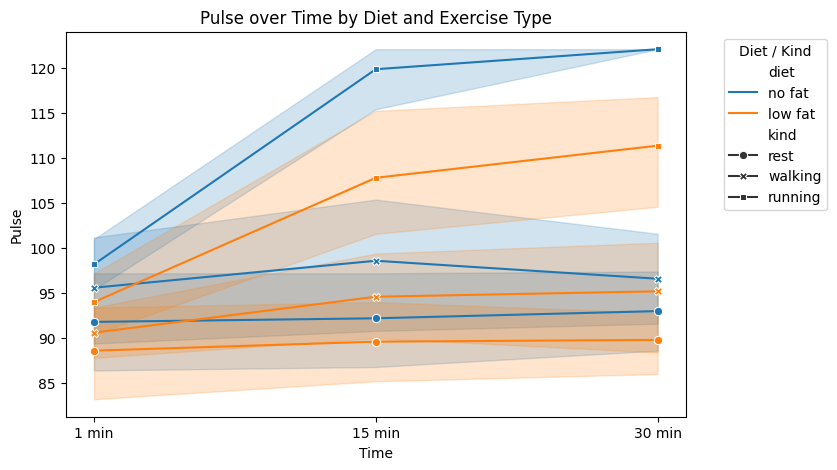

In [56]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='time', y='pulse', hue='diet', style='kind', markers=True, dashes=False)
plt.title('Pulse over Time by Diet and Exercise Type')
plt.xlabel('Time')
plt.ylabel('Pulse')
plt.legend(title='Diet / Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

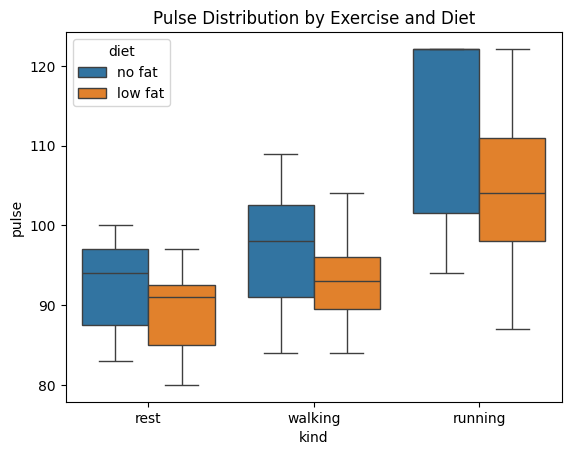

In [62]:
sns.boxplot(x='kind', y='pulse', hue='diet', data=df)
plt.title('Pulse Distribution by Exercise and Diet')
plt.show()

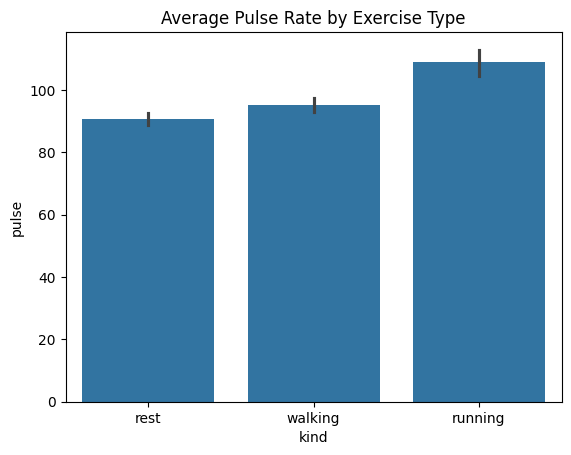

In [66]:
sns.barplot(x='kind', y='pulse', data=df)
plt.title('Average Pulse Rate by Exercise Type')
plt.show()

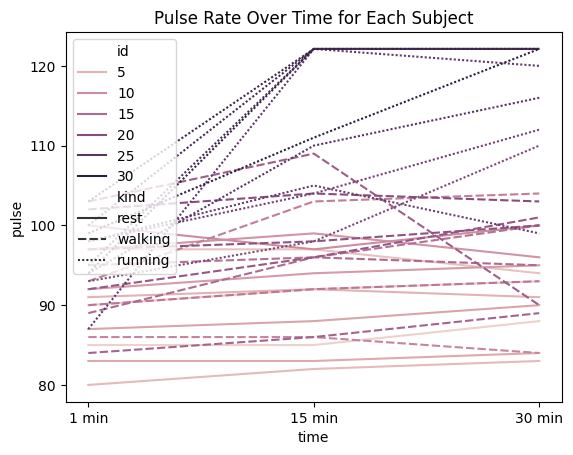

In [68]:
sns.lineplot(x='time', y='pulse', hue='id', data=df, style='kind')
plt.title('Pulse Rate Over Time for Each Subject')
plt.show()

In [70]:
avg_pulse_by_kind_diet = df.groupby(['kind', 'diet'])['pulse'].mean().reset_index()
print(avg_pulse_by_kind_diet)

      kind     diet       pulse
0     rest   no fat   92.333333
1     rest  low fat   89.333333
2  walking   no fat   96.933333
3  walking  low fat   93.466667
4  running   no fat  113.408333
5  running  low fat  104.408333


/tmp/ipython-input-1429858353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse_by_kind_diet = df.groupby(['kind', 'diet'])['pulse'].mean().reset_index()


In [71]:
max_pulse_id = df.loc[df['pulse'].idxmax()]
print("Subject with the highest pulse rate:\n", max_pulse_id)

Subject with the highest pulse rate:
 id               24
diet        low fat
pulse       122.125
time         15 min
kind        running
time_num         15
kind_num          2
diet_num          1
Name: 70, dtype: object


In [72]:
from scipy import stats

# Calculate the mean pulse for each kind of exercise
mean_pulse = df.groupby('kind')['pulse'].mean()
print("Mean pulse rate by exercise type:")
print(mean_pulse)

# Let's perform a hypothetical t-test to compare walking vs running
walking_pulse = df[df['kind'] == 'walking']['pulse']
running_pulse = df[df['kind'] == 'running']['pulse']

t_statistic, p_value = stats.ttest_ind(walking_pulse, running_pulse, equal_var=False)

print("\nHypothetical T-test results (Walking vs. Running):")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The difference in mean pulse rates is statistically significant.")
else:
    print("Conclusion: There is no statistically significant difference in mean pulse rates.")

Mean pulse rate by exercise type:
kind
rest        90.833333
walking     95.200000
running    108.908333
Name: pulse, dtype: float64

Hypothetical T-test results (Walking vs. Running):
T-statistic: -5.53
P-value: 0.0000
Conclusion: The difference in mean pulse rates is statistically significant.


/tmp/ipython-input-3328345724.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pulse = df.groupby('kind')['pulse'].mean()


In [74]:
df_encoded = pd.get_dummies(df, columns=['kind', 'diet'], drop_first=True, dtype=int)

# Display the new DataFrame with encoded columns
print(df_encoded.head())
X = df_encoded.drop('pulse', axis=1)
y = df_encoded['pulse']

   id  pulse    time time_num kind_num diet_num  kind_walking  kind_running  \
0   1   85.0   1 min        1        0        1             0             0   
1   1   85.0  15 min       15        0        1             0             0   
2   1   88.0  30 min       30        0        1             0             0   
3   2   90.0   1 min        1        0        1             0             0   
4   2   92.0  15 min       15        0        1             0             0   

   diet_low fat  
0             1  
1             1  
2             1  
3             1  
4             1  


Conclusion and Summary of Findings
The Exploratory Data Analysis of the exercise dataset successfully revealed key patterns and relationships between the variables. The most significant factor influencing a subject's pulse rate is the type of exercise performed.

Here are the primary insights:

Exercise Type is the Main Driver of Pulse Rate: The data shows a direct and strong correlation between exercise intensity and pulse rate. The average pulse rate was lowest for subjects at rest, increased noticeably during walking, and was highest for subjects running. This confirms the expected physiological response to increasing physical exertion.

Diet's Influence is Subtle: While not as pronounced as the effect of exercise type, the subject's diet (low fat vs. no fat) appears to have a minor influence. The visualizations showed that subjects on a no fat diet generally had a slightly higher average pulse rate than those on a low fat diet, particularly during more intense activities like running.

Pulse Rate Increases Over Time: The line plots clearly illustrated that for active exercises (walking and running), the pulse rate continued to increase between the 15-minute and 30-minute marks. This indicates a sustained physiological response to the physical activity, while the pulse rate for subjects at rest remained stable.

In conclusion, the exercise dataset provides a clear and intuitive picture of how different levels of physical activity affect a person's pulse rate. The EDA process successfully identified these core trends and laid a strong foundation.